In [5]:
import matplotlib.pyplot as plt
import torch
from torchvision import transforms
from torch.utils.data import DataLoader
import numpy as np

from vigor import VigorDatasetTrain

import albumentations as A
from albumentations.pytorch import ToTensorV2
# Define transformations
# For testing purposes, we'll use basic transformations without normalization to simplify plotting
transform_query = A.Compose([
    A.Resize(256, 512),
    ToTensorV2(),
])

transform_reference = A.Compose([
    A.Resize(256, 256),
    ToTensorV2(),
])

# Instantiate the dataset
dataset = VigorDatasetTrain(
    data_folder='/home/erzurumlu.1/yunus/research_drive/data/VIGOR',  # Replace with your data folder path
    transforms_query=transform_query,
    transforms_reference=transform_reference
)



/home/erzurumlu.1/yunus/git/Sample4Geo/sample4geo/dataset/vigor.py:46: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_tmp = pd.read_csv(f'{data_folder}/splits/{city}/satellite_list.txt', header=None, delim_whitespace=True)
/home/erzurumlu.1/yunus/git/Sample4Geo/sample4geo/dataset/vigor.py:46: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_tmp = pd.read_csv(f'{data_folder}/splits/{city}/satellite_list.txt', header=None, delim_whitespace=True)
/home/erzurumlu.1/yunus/git/Sample4Geo/sample4geo/dataset/vigor.py:46: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_tmp = pd.read_csv(f'{data_folder}/splits/{city}/satellite_list.txt', header=None, delim_whitespace=True)
/home/erzurumlu.1/yunus/git/Sam

Ground: HW6RCbirYSwP_3RMPDg0ZA,47.612725,-122.329752,.jpg - Satellite: satellite_47.61276509959049_-122.32970455960427.png
Ground: mXurSJZR1IOG9FnXxEgF6A,41.889101,-87.617636,.jpg - Satellite: satellite_41.889126259600694_-87.61761898218617.png
Ground: BiImHDSxT6o43GKGDJvFQA,47.600907,-122.332544,.jpg - Satellite: satellite_47.60095449129554_-122.33262322499239.png
Ground: byeOHE4Ider3yKmKF65VoQ,37.766267,-122.390729,.jpg - Satellite: satellite_37.76618259319003_-122.39079739891562.png


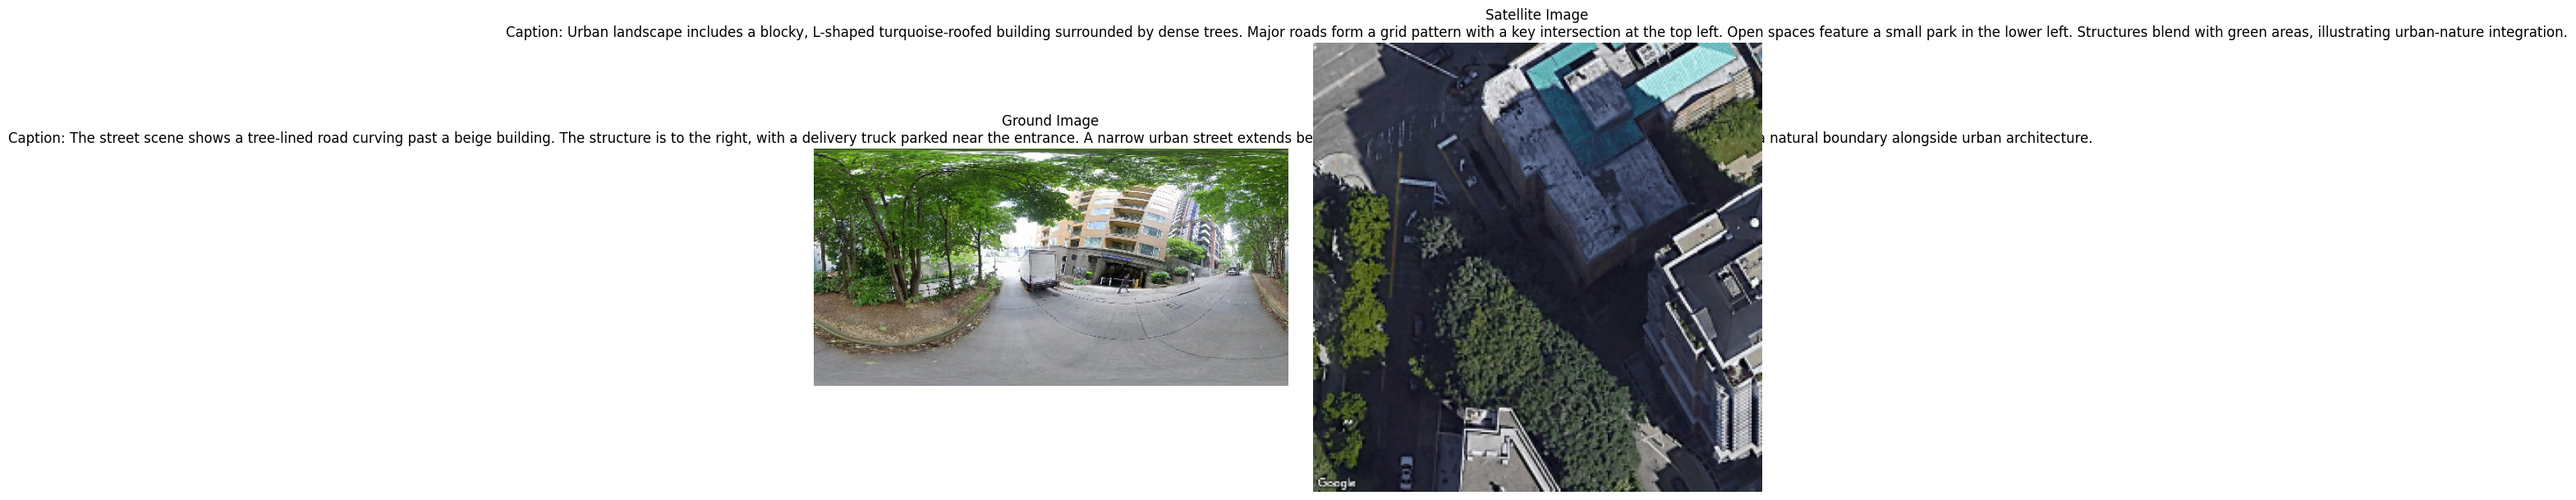

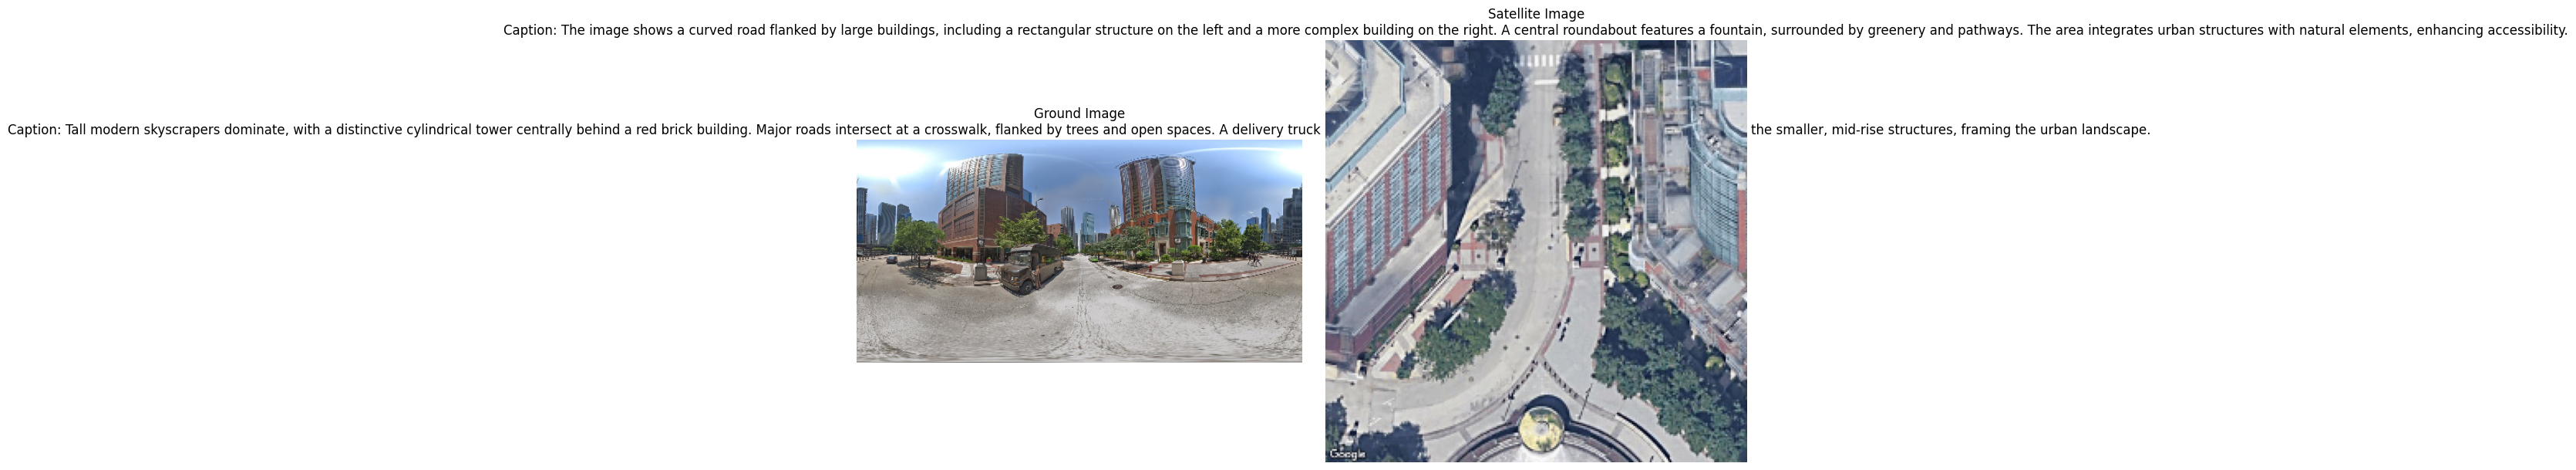

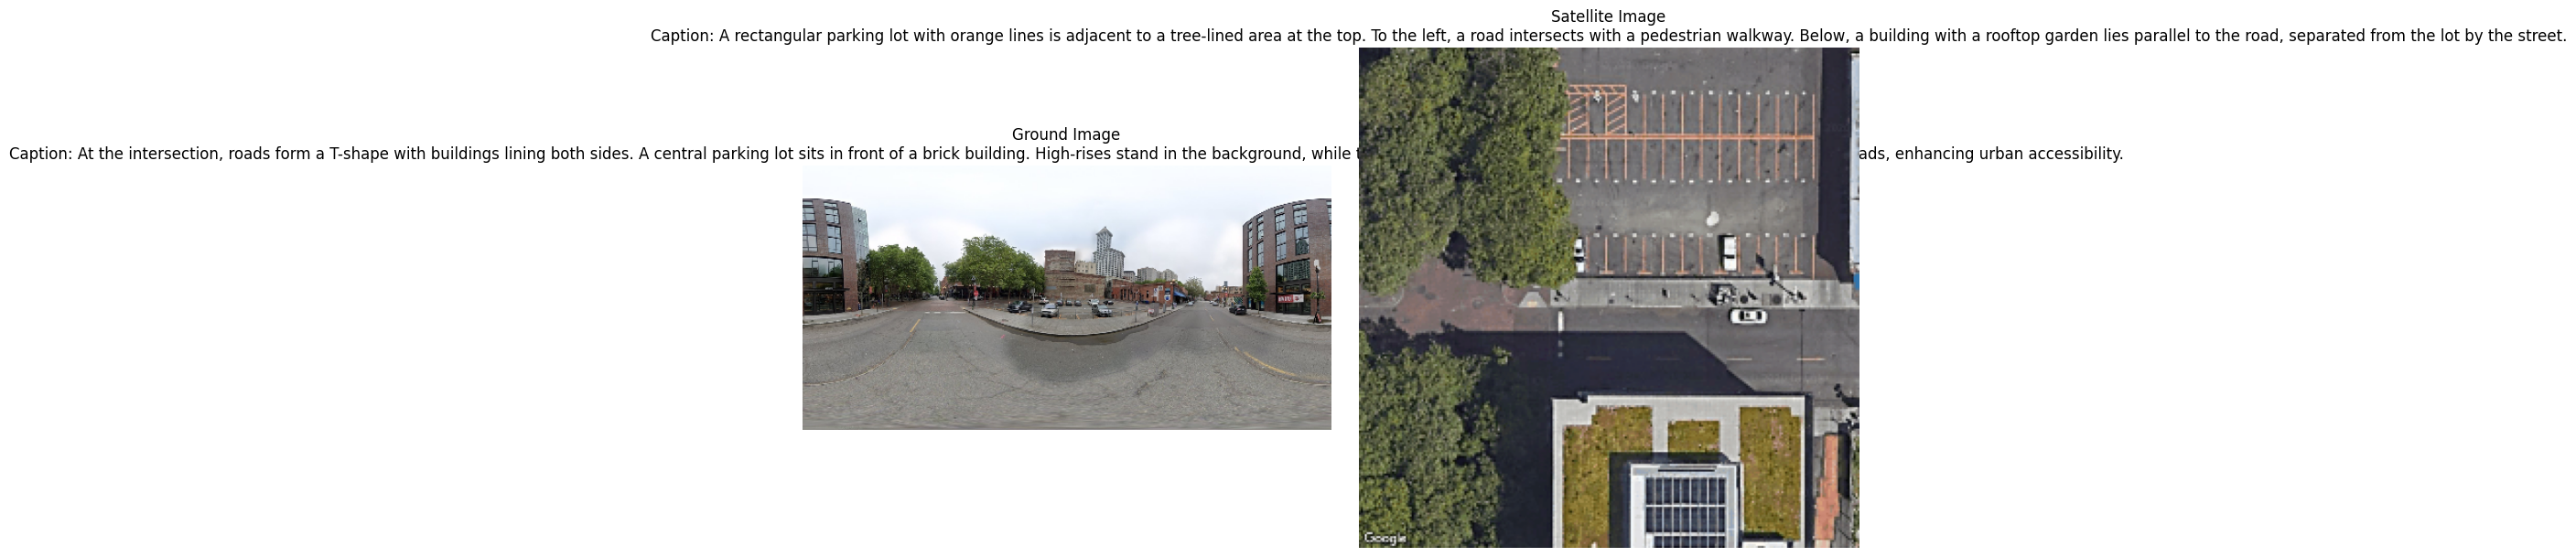

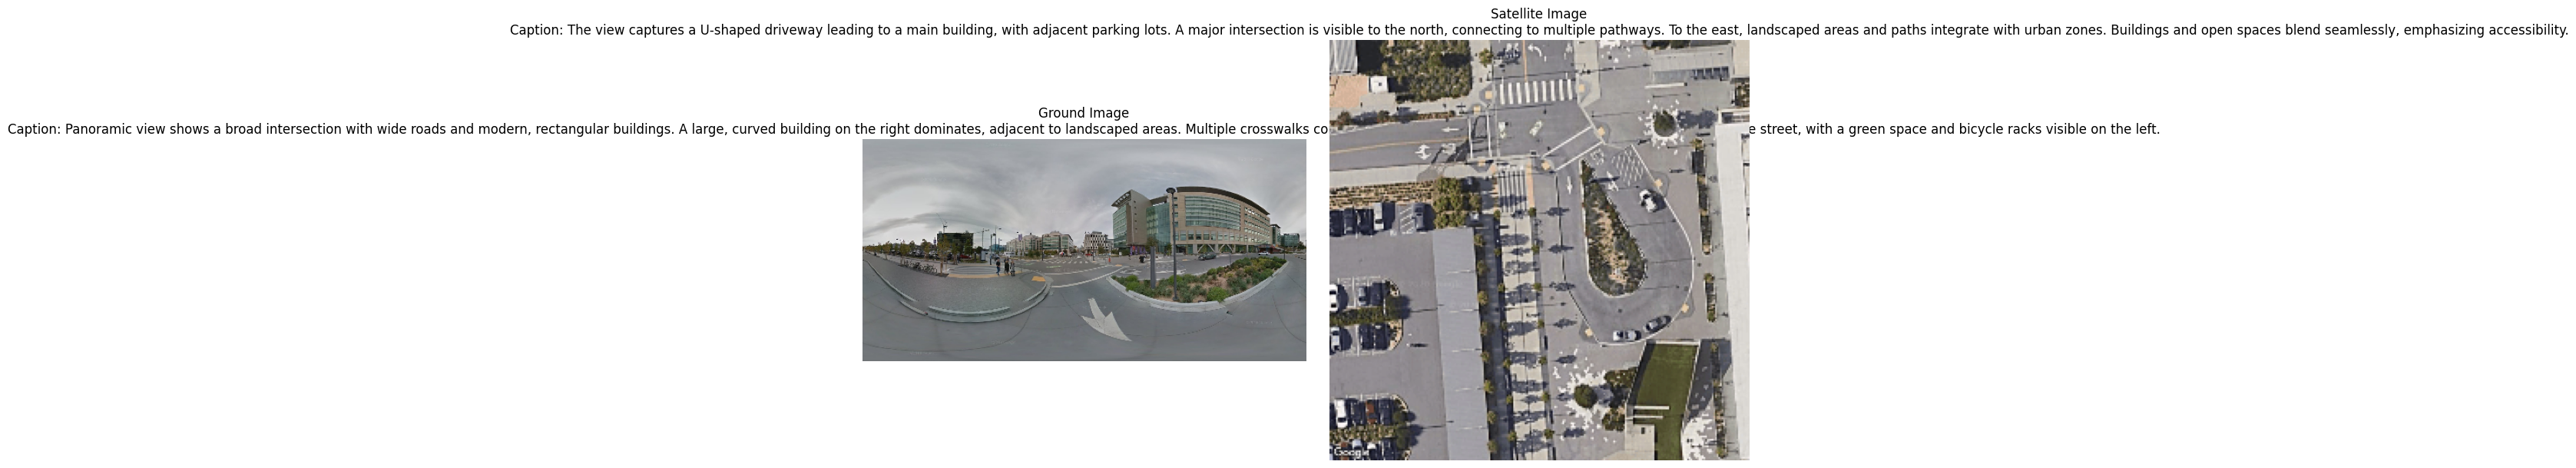

In [7]:
# Create a DataLoader
dataloader = DataLoader(
    dataset,
    batch_size=4,  # Adjust the batch size as needed
    shuffle=True,
    num_workers=0  # Set to a suitable number of workers (0 for Windows)
)

# Get a batch of data
data_iter = iter(dataloader)
query_imgs, reference_imgs, labels, ground_captions, sat_captions = next(data_iter)

# Function to convert tensors to images for plotting
def tensor_to_image(tensor):
    # Tensor shape: (C, H, W)
    image = tensor.permute(1, 2, 0).numpy()  # Convert to (H, W, C)
    # image = np.clip(image, 0, 1)  # Ensure the pixel values are between 0 and 1
    return image

# Plot the images and captions
batch_size = query_imgs.size(0)
for i in range(batch_size):
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))
    
    # Plot ground image
    ground_image = tensor_to_image(query_imgs[i])
    axs[0].imshow(ground_image)
    axs[0].set_title(f"Ground Image\nCaption: {ground_captions[i]}")
    axs[0].axis('off')
    
    # Plot satellite image
    sat_image = tensor_to_image(reference_imgs[i])
    axs[1].imshow(sat_image)
    axs[1].set_title(f"Satellite Image\nCaption: {sat_captions[i]}")
    axs[1].axis('off')
    
    plt.tight_layout()
    plt.show()